<a href="https://www.kaggle.com/code/erhanalasar/armut-arl-recommender-system?scriptVersionId=182362589" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

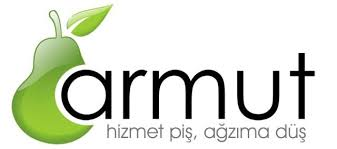

<div class="inner_cell" style="text-align:center;">
  <div class="text_cell_render border-box-sizing rendered_html">
    <p></p>
    <div class="list-group" id="list-tab" role="tablist" style="display:inline-block; text-align:left;">
      <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="border:2px solid #2ECC71;background-color:#2ECC71; color:white; font-family:Verdana;text-align: center; font-size:140%;font-weight: Bold;">Notebook Content</h3>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style="display:block; color:#2ECC71; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Libraries</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style="display:block; color:#2ECC71; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Load and Check Data</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="messages" target="_self" style="display:block; color:#2ECC71; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Data Preparation</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="messages" target="_self" style="display:block; color:#2ECC71; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Establishing and Suggesting Association Rules</a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="services" target="_self" style="display:block; color:#2ECC71; font-family:Verdana;text-align: center; font-size:130%;font-weight: Bold;">Service Suggestions</a>
    </div>
  </div>
</div>


<div class="inner_cell" style="text-align:center;">
  <div class="text_cell_render border-box-sizing rendered_html">
    <p></p>
    <div class="list-group" id="list-tab" role="tablist" style="display:inline-block; text-align:left;">
      <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="border:2px solid #2ECC71;background-color:#2ECC71; color:white; font-family:Verdana;text-align: center; font-size:140%;font-weight: Bold;">Business Problem: Building a Product Recommendation System with Association Rule Learning</h3>
      <p></p>
      <p>Armut, Turkey's largest online service platform, brings together service providers and those seeking services. It enables easy access to services such as cleaning, renovation, and transportation with just a few taps on a computer or smartphone.</p>
      <p></p>
      <p>Using the dataset containing users who have received services and the services and categories they have received, we aim to create a product recommendation system using Association Rule Learning.</p>
      <p></p>
    </div>
  </div>
</div>


<h1 style="color:#2ECC71;">Dataset Story:</h1>

<p>The dataset consists of the services received by customers and the categories of these services. It includes the date and time of each service received.</p>

<ul>
    <li><strong>UserId:</strong> Customer number</li>
    <li><strong>ServiceID:</strong> Anonymized services belonging to each category. (Example: Sofa washing service under the cleaning category) A ServiceId can be found under different categories and refers to different services under different categories. (Example: Service with CategoryId 7 ServiceId 4 is honeycomb cleaning while service with CategoryId 2 ServiceId 4 is furniture assembly)</li>
    <li><strong>CategoryID:</strong> Anonymized categories (Example: Cleaning, transportation, renovation category)</li>
    <li><strong>CreateDate:</strong> Date the service was purchased</li>
</ul>


<h1 style="color:#2ECC71;">Libraries:</h1>

In [1]:
%%capture
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr', False)

<h1 style="color:#2ECC71;">Load and Check Data:</h1>

In [3]:
armut = pd.read_csv('/kaggle/input/armut-data/armut_data.csv')
df = armut.copy()
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


In [4]:
def check_df(dataframe, head=5, tail=5, quan=False):
    print('########## Shape ##########')
    print(dataframe.shape)
    print('########## Types ##########')
    print(dataframe.dtypes)
    print('########## Head ##########')
    print(dataframe.head(head))
    print('########## Tail ##########')
    print(dataframe.tail(tail))
    print('########## NA ##########')
    print(dataframe.isnull().sum())
    if quan:
        print('########## Quantiles ##########')
        print(dataframe.describe([0, 0.01, 0.25, 0.50, 0.75, 0.99, 1]).T)

check_df(df, quan=True)

########## Shape ##########
(162523, 4)
########## Types ##########
UserId         int64
ServiceId      int64
CategoryId     int64
CreateDate    object
dtype: object
########## Head ##########
   UserId  ServiceId  CategoryId           CreateDate
0   25446          4           5  2017-08-06 16:11:00
1   22948         48           5  2017-08-06 16:12:00
2   10618          0           8  2017-08-06 16:13:00
3    7256          9           4  2017-08-06 16:14:00
4   25446         48           5  2017-08-06 16:16:00
########## Tail ##########
        UserId  ServiceId  CategoryId           CreateDate
162518   10591         25           0  2018-08-06 14:40:00
162519   10591          2           0  2018-08-06 14:43:00
162520   10591         31           6  2018-08-06 14:47:00
162521   12666         38           4  2018-08-06 16:01:00
162522   17497         47           7  2018-08-06 16:04:00
########## NA ##########
UserId        0
ServiceId     0
CategoryId    0
CreateDate    0
dtype: int64


<h1 style="color:#2ECC71;">Data Preparation:</h1>

<div class="alert alert-block alert-success">
        <b> ➕ ServiceID represents a different service for each CategoryID. We will combine ServiceID and CategoryID with "_" to create a new variable to represent these services. </b>
</div>
<br> 


In [5]:
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


In [6]:
df['Service'] = df['ServiceId'].astype(str) + '_' + df['CategoryId'].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


<div class="alert alert-block alert-success">
        <b> ➕ The data set consists of the date and time the services are received, there is no basket definition (invoice, etc.). In order to apply the Association Rule Learning, the definition of basket (invoice, etc.) must be created. Here, the definition of basket is the services that each customer receives on a monthly basis. For example; Basket consisting of 4_5, 48_5, 6_7, 47_7 services received by the customer with ID number 25446 in the 8th month of 2017; 17_5, 14_7 Services received in the 9th month of 2017 represent another basket. Baskets must be identified by a unique ID. To do this a new date variable that contains only the year and month will be creaed. Then we will combine UserID and the new date variable with "_" and assign it to a new variable called basketId.</b>
</div>
<br>

In [7]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'])

In [8]:
df['New_Date'] = pd.to_datetime(df['CreateDate'],format='%Y-%m').dt.to_period('M')
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service,New_Date
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08


In [9]:
df['BasketId'] = df['UserId'].astype(str) + '_' + df['New_Date'].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service,New_Date,BasketId
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


<h1 style="color:#2ECC71;">Establishing and Suggesting Association Rules:</h1>

In [10]:
def create_service_product_df(dataframe):
    return dataframe.groupby(['BasketId', 'Service'])['CategoryId'].count().unstack().fillna(0). \
            map(lambda x: 1 if x > 0 else 0)

service_product_df = create_service_product_df(df)

In [11]:
service_product_df.head(10)

Service,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10000_2017-12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000_2018-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001_2018-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2 style="color:#2ECC71;">Let's create apriori algorithm and association rules:</h2>

In [12]:
def create_rules(dataframe):
    frequent_itemsets = apriori(dataframe.astype('bool'), min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
    return rules
rules = create_rules(service_product_df)

In [13]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325,0.488074
1,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216,0.449965
2,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833,0.616073
3,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066,0.609539
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211,0.725728
5,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262,0.803047
6,(15_1),(38_4),0.120963,0.066568,0.011177,0.092397,1.388001,0.003124,1.028458,0.318007
7,(38_4),(15_1),0.066568,0.120963,0.011177,0.167897,1.388001,0.003124,1.056404,0.299475
8,(15_1),(49_1),0.120963,0.067762,0.010011,0.082763,1.221375,0.001815,1.016354,0.206192
9,(49_1),(15_1),0.067762,0.120963,0.010011,0.147741,1.221375,0.001815,1.031420,0.194425


<h1 style="color:#2ECC71;">Service Suggestions:</h1>

In [14]:
def arl_recommender(rules_df, service, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, serv in enumerate(sorted_rules["antecedents"]):
        for j in list(serv):
            if j == service:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return print("You might also need this service -->",recommendation_list[0:rec_count])

In [15]:
arl_recommender(rules, '2_0',3)

You might also need this service --> ['22_0', '25_0', '15_1']
